In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')
import sys
sys.path.append('/content/gdrive/My Drive/laboral/unipamplona/2020i/unidad1_Datos/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
import pandas as pd
from numpy import array, arange
from pylab import plot, show, grid, xticks, xlim, rcParams, legend

In [0]:
filePath = 'gdrive/My Drive/laboral/unipamplona/2020i/fisComp-ii/unidad1_Datos/data/Casos1_13abr2020.csv'

data = pd.read_csv(filePath) # Leyendo datos desde el archivo Casos1.csv

In [4]:
data.head() # Muestra las primeras cinco líneas del archivo Casos1.csv

,ID de caso,Fecha de diagnóstico,Ciudad de ubicación,Departamento o Distrito,Atención**,Edad,Sexo,Tipo*,País de procedencia
0,1,06/03/2020,BOGOTA,Bogotá D.C.,Recuperado,19,F,Importado,ITALIA
1,2,09/03/2020,BUGA,Valle del Cauca,Recuperado,34,M,Importado,ESPAÑA
2,3,09/03/2020,MEDELLIN,Antioquia,Recuperado,50,F,Importado,ESPAÑA
3,4,11/03/2020,MEDELLIN,Antioquia,Recuperado,55,M,Relacionado,COLOMBIA
4,5,11/03/2020,MEDELLIN,Antioquia,Recuperado,25,M,Relacionado,COLOMBIA


In [0]:
dataSex = pd.DataFrame(data, columns= ['Fecha de diagnóstico','Sexo','Edad', 'Atención**']) # Cargando en la variable dataSex los campos: Fecha diagnóstico, Sexo y Edad

In [0]:
histo = dataSex.groupby('Edad')['Sexo'].sum() # Suma el número de apariciones de M y F: Masculino, Femenino
histAten = dataSex.groupby('Edad')['Atención**'].sum()
#print(histo.str.count('F'), histo.str.count('M'))

In [7]:
male = histo.str.count('M')
female = histo.str.count('F')
total = male.sum()+female.sum()

print("hombres:",male.sum(), round((male.sum()/total)*100,2), "%")
print("Mujeres:",female.sum(), round((female.sum()/total)*100,2), "%")
print("Total:", total)

hombres: 1405 50.61 %
Mujeres: 1371 49.39 %
Total: 2776


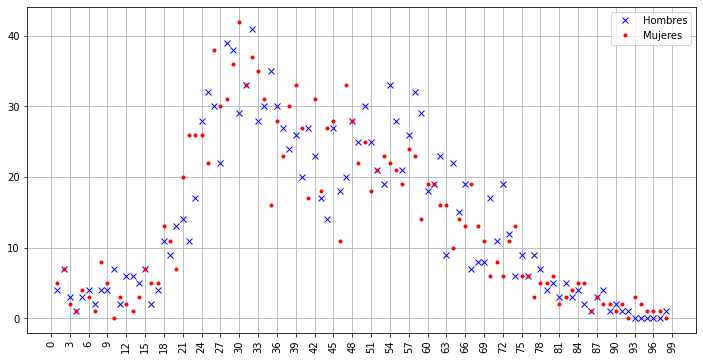

In [8]:
rcParams['figure.figsize'] = 12, 6

plot(histo.str.count('M'),'bx', label='Hombres')
plot(histo.str.count('F'),'r.', label='Mujeres')
xticks(arange(0, 100, step=3.), rotation=90)
grid()
#xlim(0,20)
legend()
show()

# From Pandas Frame to Numpy Array

A continuación se muestra cómo convertir de formato Pandas a Array. De esta manera pueden usar las librerías que desarrollaron en clase.

4 5


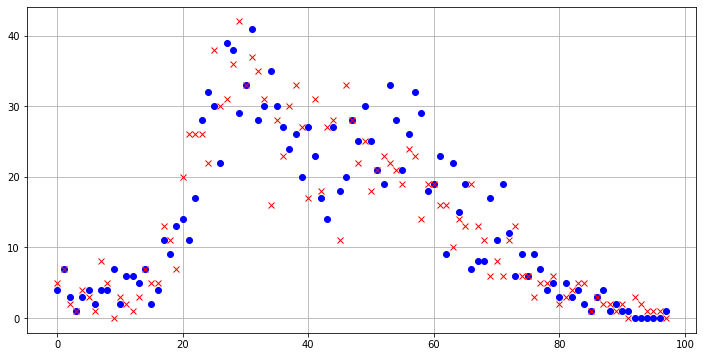

In [14]:
hom = array( histo.str.count('M') )
muj = array( histo.str.count('F') )

print(hom[0], muj[0])

plot(hom, 'ob')
plot(muj, 'xr')
grid()
show()

In [10]:
print(histAten)

Edad
1              CasaCasaCasaCasaHospitalCasaCasaCasaCasa
2     CasaCasaCasaCasaCasaCasaCasaCasaCasaCasaCasaCa...
3                             CasaCasaFallecidoCasaCasa
4                                              CasaCasa
5                          CasaCasaCasaCasaCasaCasaCasa
                            ...                        
94                                        FallecidoCasa
95                                                 Casa
96                                            Fallecido
97                                             Hospital
98                                            Fallecido
Name: Atención**, Length: 98, dtype: object


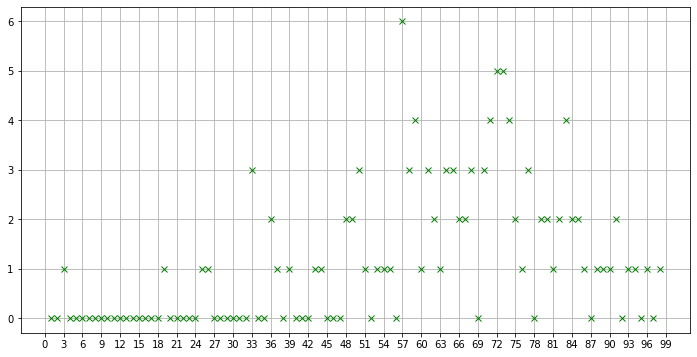

In [11]:
house = histAten.str.count('Casa')
recov = histAten.str.count('Recuperado')
death = histAten.str.count('Fallecido')

#plot(house, 'bo', label='Casa')
#plot(recov, 'ro', label='Recuperado')
plot(death, 'gx', label='Fallecido')
xticks( arange(0, 100, step=3.) )
grid()
show()